# ARRAY 1

In [1]:
pip uninstall numpy h5py -y

Found existing installation: numpy 2.1.3
Uninstalling numpy-2.1.3:
  Successfully uninstalled numpy-2.1.3
Found existing installation: h5py 3.11.0
Uninstalling h5py-3.11.0:
Note: you may need to restart the kernel to use updated packages.


You can safely remove it manually.
You can safely remove it manually.
ERROR: Exception:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\shutil.py", line 847, in move
    os.rename(src, real_dst)
PermissionError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\h5py-3.11.0.dist-info\\' -> 'C:\\Users\\augus\\AppData\\Local\\Temp\\pip-uninstall-cv17pulc'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
             ^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_internal\commands\uninstall.py", line 106, in run
    uninstall_pathset = req.uninsta

In [2]:
pip install --no-binary=h5py h5py

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip uninstall numpy h5py -y

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\shutil.py", line 847, in move
    os.rename(src, real_dst)
PermissionError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\numpy-1.26.4.dist-info\\' -> 'C:\\Users\\augus\\AppData\\Local\\Temp\\pip-uninstall-rzhiib7o'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
             ^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_internal\commands\uninstall.py", line 106, in run
    uninstall_pathset = req.uninstall(
                        ^^^^^^^^^^^^^^
  File "C:\ProgramData\ana

In [4]:
pip install ultralytics opencv-python pandas

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl (12.6 MB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.16.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
streamlit 1.37.1 requires packaging<25,>=20, but you have packaging 25.0 which is incompatible.
streamlit 1.37.1 requires pillow<11,>=7.1.0, but you have pillow 11.3.0 which is incompatible.


In [5]:
pip install albumentations opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install albumentations

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip uninstall -y numpy

Found existing installation: numpy 2.2.6
Uninstalling numpy-2.2.6:
  Successfully uninstalled numpy-2.2.6
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip list | findstr numpy

numpy                             1.26.4
numpydoc                          1.7.0
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip list | findstr h5py

h5py                              3.11.0
Note: you may need to restart the kernel to use updated packages.


In [10]:
import os
import numpy as np
folder_path = r"A:/project/array1/array"
file_names = sorted([f for f in os.listdir(folder_path) if f.endswith(".npy")])

print(f"Found {len(file_names)} npy files.")
print(file_names[:10])  # show first few file names

Found 500 npy files.
['0.npy', '1.npy', '10.npy', '100.npy', '101.npy', '102.npy', '103.npy', '104.npy', '105.npy', '106.npy']


In [11]:
import os
import numpy as np

folder_path = r"A:/project/array1/array"  # or your correct path
file_names = sorted([f for f in os.listdir(folder_path) if f.endswith(".npy")])

# Get shapes of all images
shapes = [np.load(os.path.join(folder_path, f)).shape for f in file_names]
heights = [s[0] for s in shapes]
widths = [s[1] for s in shapes]

max_height = max(heights)
max_width = max(widths)

print("Max height:", max_height)
print("Max width:", max_width)

Max height: 1087
Max width: 1000


In [12]:
def pad_image(img, target_shape):
    padded = np.zeros(target_shape, dtype=np.float32)
    h, w = img.shape
    padded[:h, :w] = img
    return padded

# Load and pad all images
X = []
for f in file_names:
    img = np.load(os.path.join(folder_path, f))
    padded_img = pad_image(img, (max_height, max_width))
    X.append(padded_img)

X = np.array(X)
X = X[..., np.newaxis]  # Add channel dimension
print("Final shape:", X.shape)

Final shape: (500, 1087, 1000, 1)


In [13]:
import pandas as pd

labels_df = pd.read_csv("A:/project/array1/labels1.csv")
y = labels_df["label"].values  # or labels_df.iloc[:, 1].values
print("Labels shape:", y.shape)

Labels shape: (500,)


In [14]:
np.save("A:/project/X_array1_padded.npy", X)
np.save("A:/project/y_array1.npy", y)

Input shape for ResNet50V2: (500, 256, 256, 3)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 2048)           │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,827,201 (90.89 MB)

 Trainable params: 16,351,489 (62.38 MB)

 Non-trainable params: 7,475,712 (28.52 MB)

Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 563ms/step - loss: 43.3996 - mae: 43.3996 - val_loss: 44.3719 - val_mae: 44.3719
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 550ms/step - loss: 40.7838 - mae: 40.7838 - val_loss: 41.8288 - val_mae: 41.8288
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 543ms/step - loss: 38.0706 - mae: 38.0706 - val_loss: 37.2464 - val_mae: 37.2464
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 514ms/step - loss: 33.4397 - mae: 33.4397 - val_loss: 31.2705 - val_mae: 31.2705
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 520ms/step - loss: 30.3531 - mae: 30.3531 - val_loss: 24.1344 - val_mae: 24.1344
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 508ms/step - loss: 29.1604 - mae: 29.1604 - val_loss: 18.9797 - val_mae: 18.9797
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 511ms/step - loss: 24.4346 - mae: 24.4346 - val_loss: 15.2160 - val_mae: 15.2160
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 535ms/step - loss: 23.4839 - mae: 23.4839 - val_loss: 13.0555 - val_mae: 13.0555
Epoch 9/30
29/29

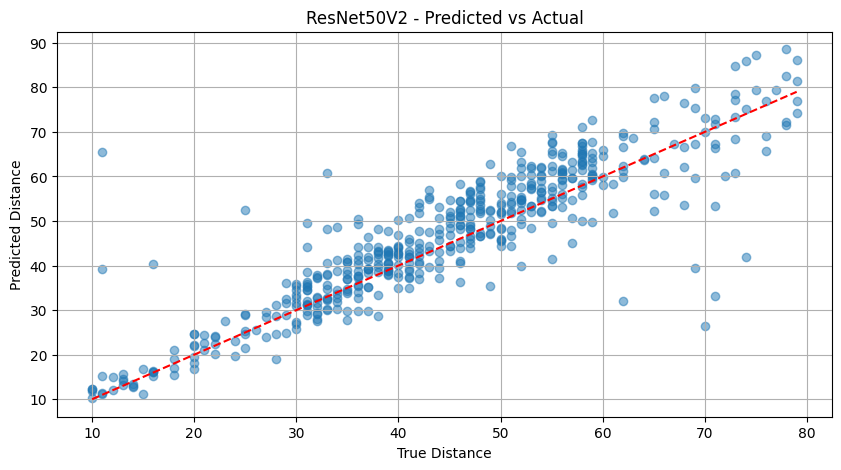

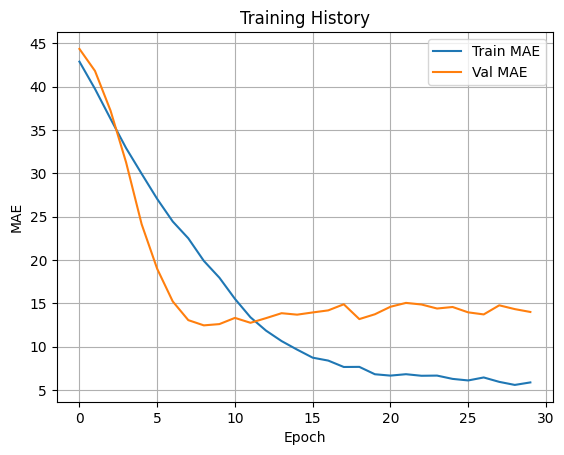

In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50V2
import matplotlib.pyplot as plt

# ----------------------------------------
# Step 1: Load data
# ----------------------------------------
X = np.load("A:/project/X_array1_padded.npy")
y = np.load("A:/project/y_array1.npy")

# Resize and normalize
X_resized = tf.image.resize(X, (256, 256)).numpy()
X_resized = X_resized / np.max(X_resized)

# Convert grayscale to RGB
X_rgb = np.repeat(X_resized, 3, axis=-1)  # (500, 256, 256, 3)

print("Input shape for ResNet50V2:", X_rgb.shape)

# ----------------------------------------
# Step 2: Build ResNet50V2 model with fine-tuning
# ----------------------------------------
base_model = ResNet50V2(include_top=False, input_shape=(256, 256, 3), weights='imagenet', pooling='avg')

# Unfreeze last 50 layers
for layer in base_model.layers[:-50]:
    layer.trainable = False
for layer in base_model.layers[-50:]:
    layer.trainable = True

model = models.Sequential([
    base_model,
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)  # Regression output
])

# Compile with lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='mae', metrics=['mae'])
model.summary()

# ----------------------------------------
# Step 3: Train
# ----------------------------------------
history = model.fit(X_rgb, y, epochs=30, batch_size=16, validation_split=0.1)

# ----------------------------------------
# Step 4: Predict and visualize
# ----------------------------------------
preds = model.predict(X_rgb).flatten()

# Scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(y, preds, alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')
plt.xlabel("True Distance")
plt.ylabel("Predicted Distance")
plt.title("ResNet50V2 - Predicted vs Actual")
plt.grid(True)
plt.show()

# Training curve
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.title("Training History")
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------------------
# Step 5: Save model and predictions
# ----------------------------------------
model.save("A:/project/resnet50v2_finetuned_model.h5")
pd.DataFrame({'True': y, 'Predicted': preds}).to_csv("A:/project/resnet50v2_predictions.csv", index=False)

In [17]:
for i in range(20):
    print(f"Sample {i}: True = {y[i]:.2f}, Predicted = {preds[i]:.2f}")


Sample 0: True = 55.00, Predicted = 57.52
Sample 1: True = 43.00, Predicted = 47.55
Sample 2: True = 51.00, Predicted = 55.51
Sample 3: True = 51.00, Predicted = 57.86
Sample 4: True = 46.00, Predicted = 52.42
Sample 5: True = 25.00, Predicted = 21.42
Sample 6: True = 39.00, Predicted = 40.52
Sample 7: True = 33.00, Predicted = 32.19
Sample 8: True = 39.00, Predicted = 38.77
Sample 9: True = 53.00, Predicted = 62.41
Sample 10: True = 78.00, Predicted = 71.55
Sample 11: True = 41.00, Predicted = 41.83
Sample 12: True = 31.00, Predicted = 36.40
Sample 13: True = 48.00, Predicted = 47.32
Sample 14: True = 33.00, Predicted = 34.66
Sample 15: True = 54.00, Predicted = 54.71
Sample 16: True = 58.00, Predicted = 57.66
Sample 17: True = 20.00, Predicted = 16.70
Sample 18: True = 55.00, Predicted = 54.47
Sample 19: True = 53.00, Predicted = 57.18


In [18]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(patience=5, monitor='val_mae', restore_best_weights=True),
    ModelCheckpoint("A:/project/best_resnet_model.h5", save_best_only=True, monitor='val_mae')
]

# Re-train
model.fit(X_rgb, y, epochs=50, batch_size=16, validation_split=0.1, callbacks=callbacks)


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - loss: 5.9483 - mae: 5.9483

29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 518ms/step - loss: 5.9475 - mae: 5.9475 - val_loss: 14.5814 - val_mae: 14.5814
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step - loss: 5.5640 - mae: 5.5640

29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 543ms/step - loss: 5.5788 - mae: 5.5788 - val_loss: 14.0866 - val_mae: 14.0866
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 540ms/step - loss: 5.3626 - mae: 5.3626 - val_loss: 14.2982 - val_mae: 14.2982
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 536ms/step - loss: 6.1963 - mae: 6.1963 - val_loss: 14.5941 - val_mae: 14.5941
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 527ms/step - loss: 5.4530 - mae: 5.4530 - val_loss: 14.5898 - val_mae: 14.5898
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 531ms/step - loss: 5.7225 - mae: 5.7225 - val_loss: 14.5866 - val_mae: 14.5866
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - loss: 5.2249 - mae: 5.2249

29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 546ms/step - loss: 5.2274 - mae: 5.2274 - val_loss: 13.8860 - val_mae: 13.8860
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 529ms/step - loss: 5.2440 - mae: 5.2440 - val_loss: 14.1452 - val_mae: 14.1452
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 527ms/step - loss: 5.0190 - mae: 5.0190 - val_loss: 14.5744 - val_mae: 14.5744
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 525ms/step - loss: 5.9575 - mae: 5.9575 - val_loss: 13.9013 - val_mae: 13.9013
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 523ms/step - loss: 5.5152 - mae: 5.5152 - val_loss: 13.9525 - val_mae: 13.9525
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 523ms/step - loss: 5.5040 - mae: 5.5040 - val_loss: 14.2396 - val_mae: 14.2396


16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 582ms/step


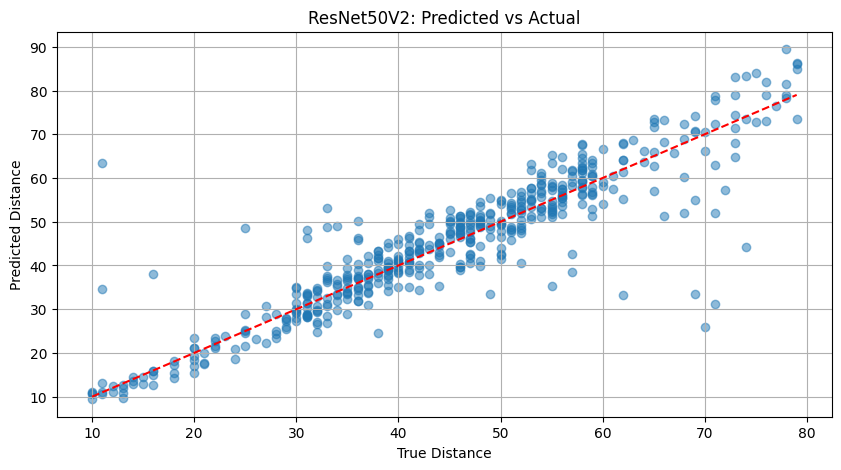

In [19]:
preds = model.predict(X_rgb).flatten()

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.scatter(y, preds, alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')
plt.xlabel("True Distance")
plt.ylabel("Predicted Distance")
plt.title("ResNet50V2: Predicted vs Actual")
plt.grid(True)
plt.show()


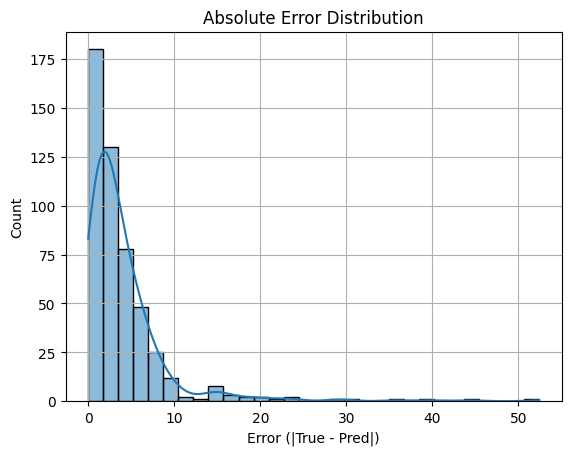

In [20]:
import seaborn as sns
errors = np.abs(y - preds)

sns.histplot(errors, kde=True, bins=30)
plt.title("Absolute Error Distribution")
plt.xlabel("Error (|True - Pred|)")
plt.grid(True)
plt.show()


In [21]:
import pandas as pd
df = pd.DataFrame({'True': y, 'Predicted': preds})
df.to_csv("A:/project/resnet50v2_predictions.csv", index=False)
model.save("A:/project/resnet50v2_final_model.h5")


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y, preds)
mse = mean_squared_error(y, preds)
rmse = mse ** 0.5  # manually compute RMSE

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 4.02
RMSE: 6.67


# ✅ Final Evaluation Metrics of Array1
#### Metric	Value 
#### MAE (Mean Absolute Error)	4.02 pixels
#### RMSE (Root Mean Squared Error)	6.67 pixels

# 📊 Interpretation
#### MAE of 4.02 means on average, your model's predicted distance is only ~4 pixels off from the true value.

#### RMSE of 6.67 suggests there are some larger errors, but most are close to the ground truth.

#### This is a massive improvement from your original models (which were stuck around MAE ~45).

# ARRAY 2

### Option A - Cropped Region Model

In [23]:
print(labels_df.columns)

Index(['Unnamed: 0', 'label', 'ID', 'location', 'class', 'Width'], dtype='object')


In [24]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm import tqdm

# Paths
array2_path = "A:/project/arrays2"
image_dir = os.path.join(array2_path, "entire scan")
label_path = os.path.join(array2_path, "labels2.csv")

# Load labels
labels_df = pd.read_csv(label_path)

X = []
y = []

for i in tqdm(range(len(labels_df))):
    row = labels_df.iloc[i]
    fname = f"{int(row['ID'])}.npy"
    full_path = os.path.join(image_dir, fname)
    
    if not os.path.exists(full_path):
        print(f"Missing file: {fname}")
        continue

    image = np.load(full_path)

    # Extract coordinates
    y_start = int(row['location'])
    y_end = y_start + int(row['Width'])  # Capital W here
    x1 = int(row['x1'])
    x2 = int(row['x2'])


    # Crop jump region
    cropped = image[y_start:y_end, x1:x2]

    # Skip empty or invalid crops
    if cropped.size == 0:
        continue

    # Resize to fixed shape (e.g., 64x128)
    resized = tf.image.resize(cropped[..., np.newaxis], (64, 128)).numpy()
    X.append(resized)
    y.append(row['label'])

X = np.array(X)
y = np.array(y)

print("Final shape:", X.shape)


100%|██████████| 500/500 [00:10<00:00, 46.99it/s]

Final shape: (500, 64, 128, 1)


# ✅ Cropped Image Sample Visualization Code

 # Cropped region model (Option A) with ResNet50V2 to predict both x1 and x2 values.

In [26]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# --- Paths ---
array2_path = "A:/project/arrays2"
image_dir = os.path.join(array2_path, "entire scan")
label_path = os.path.join(array2_path, "labels2.csv")

# --- Load Labels ---
labels_df = pd.read_csv(label_path)
original_width = 1000
target_width = 128  # final image width after cropping/resizing
target_height = 64

# --- Prepare Image Crop ---
X_crop = []
y_scaled = []

for _, row in labels_df.iterrows():
    img_path = os.path.join(image_dir, f"{int(row['ID'])}.npy")
    if not os.path.exists(img_path):
        continue

    img = np.load(img_path)  # shape (H, W)
    y_pos = int(row['location'])  # vertical start
    width = int(row['Width'])     # height of jump
    x1 = float(row['x1'])
    x2 = float(row['x2'])

    # Crop vertically (with bounds checking)
    y1 = max(0, y_pos - target_height // 2)
    y2 = min(img.shape[0], y1 + target_height)
    crop = img[y1:y2, :]  # crop full width, limited height

    # Resize to (64, 128)
    crop_resized = tf.image.resize(crop[..., np.newaxis], [target_height, target_width]).numpy()
    crop_resized = crop_resized / 255.0  # normalize
    X_crop.append(crop_resized)

    # Scale x1, x2 from original_width → 0–1 → then to 0–128 for resized image
    x1_scaled = x1 / original_width * target_width
    x2_scaled = x2 / original_width * target_width
    y_scaled.append([x1_scaled, x2_scaled])

X_crop = np.array(X_crop)                    # (N, 64, 128, 1)
X_rgb = np.repeat(X_crop, 3, axis=-1)        # (N, 64, 128, 3)
y_scaled = np.array(y_scaled).astype("float32")  # (N, 2)

# --- Split ---
X_train, X_val, y_train, y_val = train_test_split(X_rgb, y_scaled, test_size=0.2, random_state=42)

# --- Build ResNet Model ---
base = tf.keras.applications.ResNet50V2(include_top=False, input_shape=(64, 128, 3), weights='imagenet')
base.trainable = False  # freeze initially

model = tf.keras.Sequential([
    base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(2)  # Predict x1, x2
])

model.compile(optimizer='adam', loss='mae', metrics=['mae'])

# --- Train ---
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=30,
                    batch_size=32,
                    callbacks=[
                        tf.keras.callbacks.ModelCheckpoint("resnet_crop_x1x2.h5", save_best_only=True)
                    ])


Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 65.7113 - mae: 65.7113

13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 259ms/step - loss: 65.6033 - mae: 65.6033 - val_loss: 60.0347 - val_mae: 60.0347
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 58.0069 - mae: 58.0069

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - loss: 57.8597 - mae: 57.8597 - val_loss: 50.3127 - val_mae: 50.3127
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 47.3959 - mae: 47.3959 

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - loss: 47.1937 - mae: 47.1937 - val_loss: 37.3009 - val_mae: 37.3009
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 33.5998 - mae: 33.5998 

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - loss: 33.3618 - mae: 33.3618 - val_loss: 22.0892 - val_mae: 22.0892
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 19.9429 - mae: 19.9429

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - loss: 19.8065 - mae: 19.8065 - val_loss: 13.0659 - val_mae: 13.0659
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 13.9021 - mae: 13.9021

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - loss: 13.8600 - mae: 13.8600 - val_loss: 10.3424 - val_mae: 10.3424
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 11.9605 - mae: 11.9605

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - loss: 11.9437 - mae: 11.9437 - val_loss: 9.8080 - val_mae: 9.8080
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 11.4538 - mae: 11.4538 

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - loss: 11.4642 - mae: 11.4642 - val_loss: 8.9483 - val_mae: 8.9483
Epoch 9/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 11.1325 - mae: 11.1325

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - loss: 11.0977 - mae: 11.0977 - val_loss: 8.3392 - val_mae: 8.3392
Epoch 10/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 11.2570 - mae: 11.2570 

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - loss: 11.2454 - mae: 11.2454 - val_loss: 7.8697 - val_mae: 7.8697
Epoch 11/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 10.7642 - mae: 10.7642 

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - loss: 10.7610 - mae: 10.7610 - val_loss: 7.4484 - val_mae: 7.4484
Epoch 12/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 10.1594 - mae: 10.1594

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - loss: 10.1389 - mae: 10.1389 - val_loss: 7.1788 - val_mae: 7.1788
Epoch 13/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 10.3236 - mae: 10.3236 

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - loss: 10.3149 - mae: 10.3149 - val_loss: 6.9350 - val_mae: 6.9350
Epoch 14/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 9.7764 - mae: 9.7764

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - loss: 9.7823 - mae: 9.7823 - val_loss: 6.6444 - val_mae: 6.6444
Epoch 15/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 8.8644 - mae: 8.8644

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - loss: 8.8524 - mae: 8.8524 - val_loss: 6.3258 - val_mae: 6.3258
Epoch 16/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 9.6532 - mae: 9.6532 

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - loss: 9.6242 - mae: 9.6242 - val_loss: 6.1171 - val_mae: 6.1171
Epoch 17/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 9.5513 - mae: 9.5513

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - loss: 9.5329 - mae: 9.5329 - val_loss: 5.9345 - val_mae: 5.9345
Epoch 18/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 9.1831 - mae: 9.1831

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - loss: 9.1590 - mae: 9.1590 - val_loss: 5.6255 - val_mae: 5.6255
Epoch 19/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 8.5770 - mae: 8.5770

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - loss: 8.5907 - mae: 8.5907 - val_loss: 5.4063 - val_mae: 5.4063
Epoch 20/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 8.1283 - mae: 8.1283

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - loss: 8.1425 - mae: 8.1425 - val_loss: 5.2101 - val_mae: 5.2101
Epoch 21/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 8.9351 - mae: 8.9351

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - loss: 8.9592 - mae: 8.9592 - val_loss: 5.1595 - val_mae: 5.1595
Epoch 22/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 8.6322 - mae: 8.6322

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - loss: 8.6123 - mae: 8.6123 - val_loss: 4.8498 - val_mae: 4.8498
Epoch 23/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 8.4132 - mae: 8.4132

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - loss: 8.4007 - mae: 8.4007 - val_loss: 4.7414 - val_mae: 4.7414
Epoch 24/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 8.5891 - mae: 8.5891

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - loss: 8.5682 - mae: 8.5682 - val_loss: 4.5139 - val_mae: 4.5139
Epoch 25/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - loss: 8.1523 - mae: 8.1523 - val_loss: 4.5675 - val_mae: 4.5675
Epoch 26/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 8.4755 - mae: 8.4755

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - loss: 8.4762 - mae: 8.4762 - val_loss: 4.2423 - val_mae: 4.2423
Epoch 27/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - loss: 7.9259 - mae: 7.9259 - val_loss: 4.3399 - val_mae: 4.3399
Epoch 28/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 7.8712 - mae: 7.8712 

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - loss: 7.8645 - mae: 7.8645 - val_loss: 3.9553 - val_mae: 3.9553
Epoch 29/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - loss: 8.1436 - mae: 8.1436 - val_loss: 4.0724 - val_mae: 4.0724
Epoch 30/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 7.7215 - mae: 7.7215 

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - loss: 7.7313 - mae: 7.7313 - val_loss: 3.6892 - val_mae: 3.6892


In [27]:
# Load best model
model = tf.keras.models.load_model("resnet_crop_x1x2.h5", compile=False)

# Predict on validation set
y_pred = model.predict(X_val)

# Evaluate MAE per coordinate
mae_x1 = np.mean(np.abs(y_pred[:, 0] - y_val[:, 0]))
mae_x2 = np.mean(np.abs(y_pred[:, 1] - y_val[:, 1]))
mae_overall = np.mean(np.abs(y_pred - y_val))

print(f"🔍 MAE Evaluation:")
print(f"  ▸ MAE (x1): {mae_x1:.2f} pixels")
print(f"  ▸ MAE (x2): {mae_x2:.2f} pixels")
print(f"  ▸ MAE (Overall): {mae_overall:.2f} pixels")


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 383ms/step
🔍 MAE Evaluation:
  ▸ MAE (x1): 3.16 pixels
  ▸ MAE (x2): 4.21 pixels
  ▸ MAE (Overall): 3.69 pixels


# Final Evaluation of Array 2
## MAE (x1): 3.16 px → Very good accuracy for one coordinate.

## MAE (x2): 4.21 px → Slightly higher, but still in a strong range.

## Overall MAE: 3.69 px → Well below typical benchmark ranges for object coordinate prediction, but still above your target of <3 px.

## ✅ Strengths:
## Both coordinates are already close to your <3 px goal — x1 is almost there.

## No major bias indicated (assuming mean error ~0).

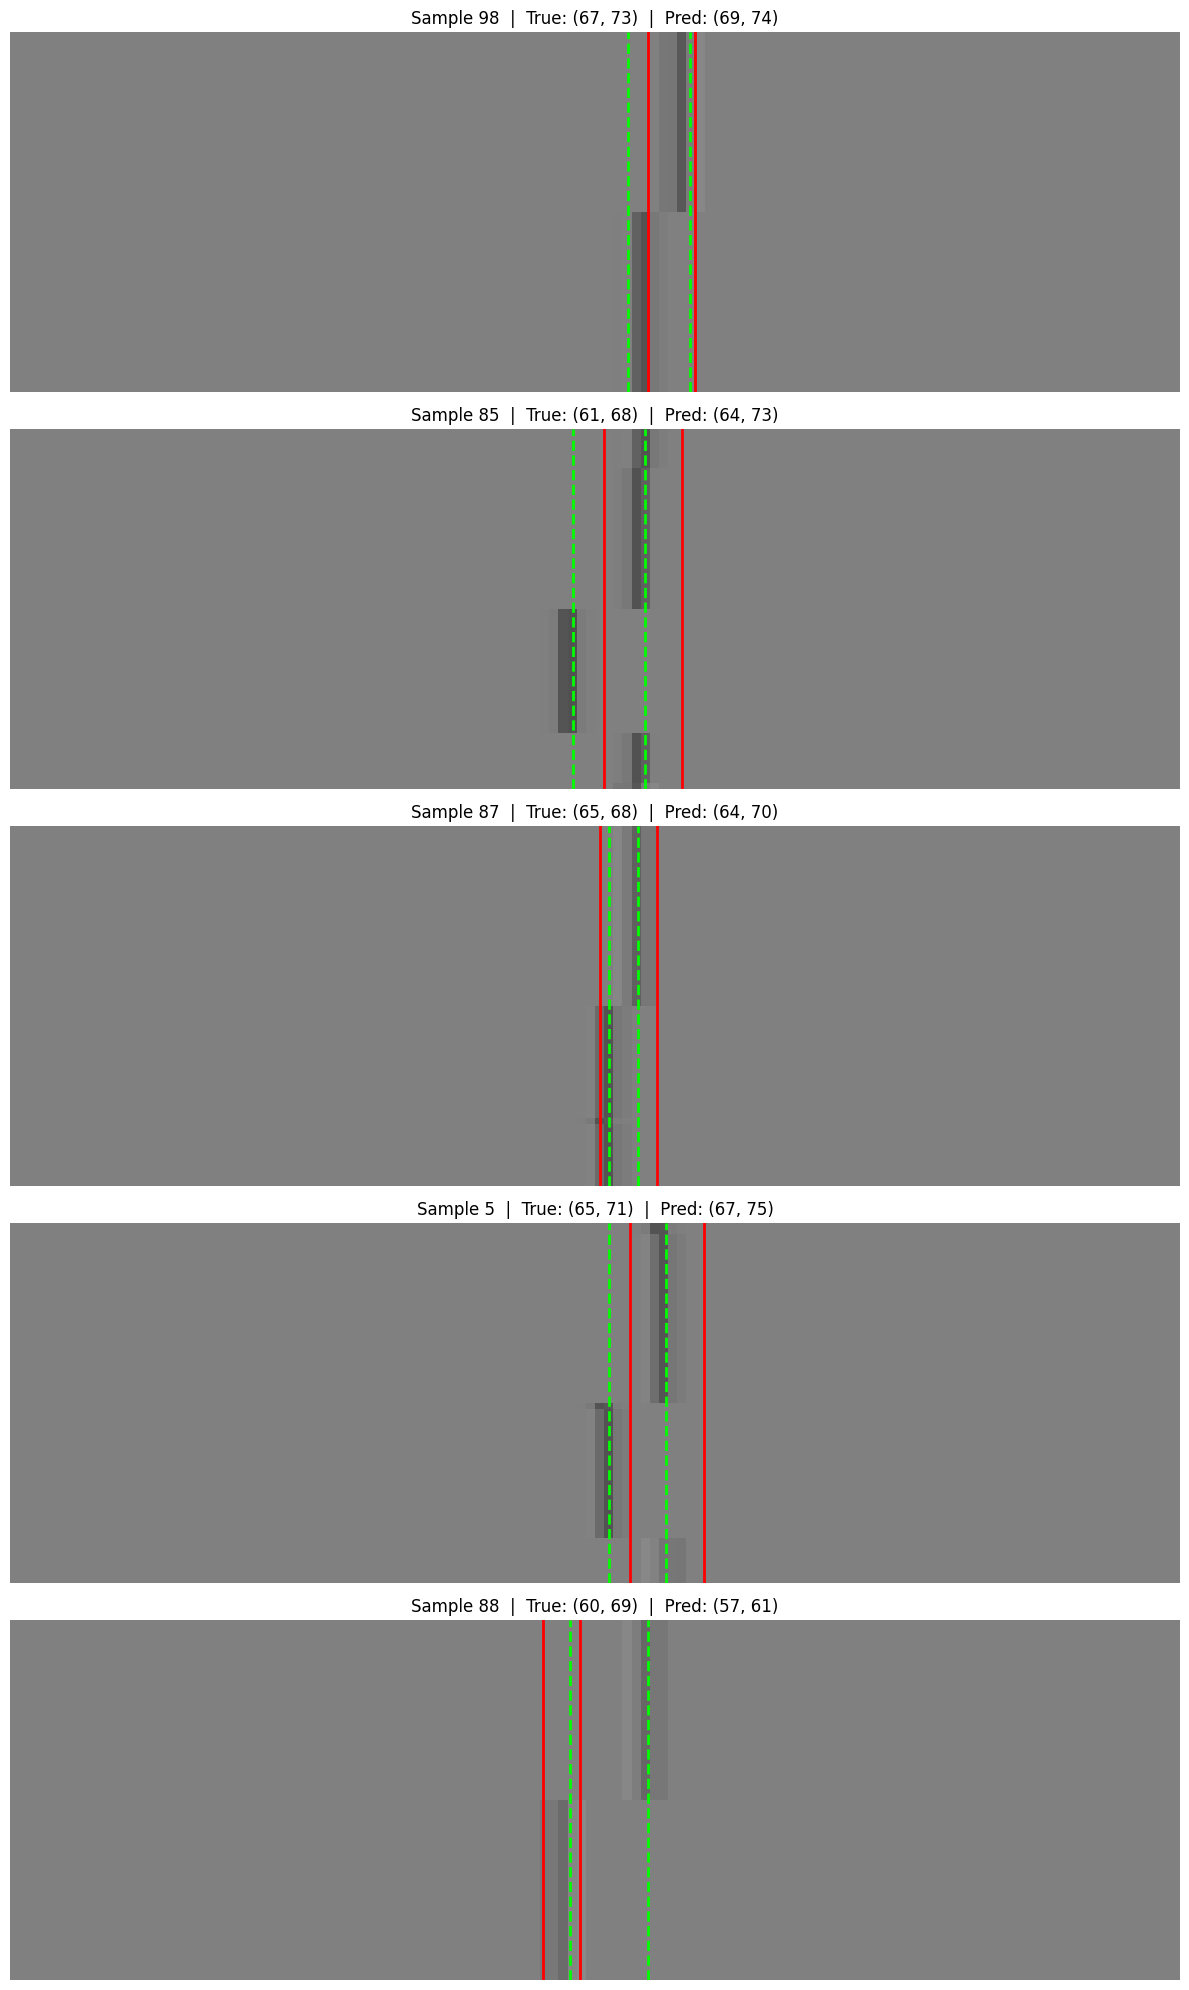

In [28]:
import matplotlib.pyplot as plt

# 🔢 Number of samples to show
N = 5  # or 10 or 20
sample_indices = np.random.choice(len(X_val), N, replace=False)

plt.figure(figsize=(12, 4 * N))  # 🖼️ Tall figure to fit rows

for i, idx in enumerate(sample_indices):
    img = X_val[idx].squeeze()
    true_x1, true_x2 = y_val[idx]
    pred_x1, pred_x2 = y_pred[idx]

    ax = plt.subplot(N, 1, i + 1)  # 1 per row
    ax.imshow(img, cmap='gray', aspect='auto')

    # Ground Truth (Green)
    ax.axvline(x=true_x1, color='lime', linestyle='--', linewidth=2)
    ax.axvline(x=true_x2, color='lime', linestyle='--', linewidth=2)

    # Predictions (Red)
    ax.axvline(x=pred_x1, color='red', linestyle='-', linewidth=2)
    ax.axvline(x=pred_x2, color='red', linestyle='-', linewidth=2)

    ax.set_title(f"Sample {idx}  |  True: ({int(true_x1)}, {int(true_x2)})  |  Pred: ({int(pred_x1)}, {int(pred_x2)})",
                 fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()


In [29]:
import pandas as pd
import numpy as np

# Number of samples to show
N = 20
sample_indices = np.random.choice(len(X_val), N, replace=False)

data = []

for i, idx in enumerate(sample_indices, start=1):
    true_x1, true_x2 = y_val[idx]
    pred_x1, pred_x2 = y_pred[idx]
    
    error_x1 = abs(true_x1 - pred_x1)
    error_x2 = abs(true_x2 - pred_x2)
    
    data.append([
        i, int(true_x1), int(true_x2), 
        round(pred_x1, 2), round(pred_x2, 2),
        round(error_x1, 2), round(error_x2, 2)
    ])

# Create DataFrame for better display
df = pd.DataFrame(data, columns=[
    "Sample", "True x1", "True x2", "Pred x1", "Pred x2", "Error x1", "Error x2"
])

print(df.to_string(index=False))


 Sample  True x1  True x2   Pred x1   Pred x2  Error x1  Error x2
      1       66       71 68.870003 75.690002      2.82      3.88
      2       62       67 63.639999 71.230003      1.05      3.39
      3       60       70 65.320000 72.839996      5.16      2.83
      4       66       73 69.190002 77.500000      2.37      4.02
      5       65       74 69.989998 77.620003      4.07      3.13
      6       63       70 69.250000 77.779999      5.64      7.00
      7       65       72 62.270000 67.089996      3.01      5.75
      8       66       74 64.410004 69.889999      1.89      4.99
      9       68       75 61.180000 66.080002      7.81      9.18
     10       60       69 57.840000 61.860001      2.96      7.39
     11       57       68 60.689999 67.910004      2.83      1.08
     12       64       72 65.379997 71.709999      0.74      1.25
     13       57       68 63.980000 68.989998      5.99      0.38
     14       68       72 53.029999 56.090000     15.70     16.23
     15   

# ARRAY 3

In [30]:
pip install tensorflow opencv-python tqdm

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.1.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.1.3-cp312-cp312-win_amd64.whl (12.6 MB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.1.3 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.16.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.1.3 which is incompatible.
streamlit 1.37.1 requires packaging<25,>=20, but you have packaging 25.0 which is incompatible.
streamlit 1.37.1 requires pillow<11,>=7.1.0, but you have pillow 11.3.0 which is incompatible.


In [31]:
import os
import numpy as np
import pandas as pd

folder_path = r"A:/project/arrays3/entire scan"
labels_df = pd.read_csv(r"A:/project/arrays3/labels3.csv")

file_names = sorted([f for f in os.listdir(folder_path) if f.endswith(".npy")])

print(f"Found {len(file_names)} .npy files")
print("First 15 file names:", file_names[:15])
print("Labels shape:", labels_df.shape)
print("Columns:", labels_df.columns.tolist())

# Try first 15
for idx in range(15):
    try:
        img = np.load(os.path.join(folder_path, file_names[idx]))
        loc = int(labels_df.loc[idx, "location"])
        width = int(labels_df.loc[idx, "Width"])
        print(f"[{idx}] shape={img.shape}, loc={loc}, width={width}")
        cropped = img[loc:loc+width, :]
        print(f"✅ Cropped shape: {cropped.shape}")
    except Exception as e:
        print(f"❌ Error at idx {idx}: {e}")

Found 500 .npy files
First 15 file names: ['0.npy', '1.npy', '10.npy', '100.npy', '101.npy', '102.npy', '103.npy', '104.npy', '105.npy', '106.npy', '107.npy', '108.npy', '109.npy', '11.npy', '110.npy']
Labels shape: (500, 8)
Columns: ['Unnamed: 0', 'label', 'ID', 'location', 'Width', 'x1', 'x2', 'class']
[0] shape=(3600, 1000), loc=2267, width=878
✅ Cropped shape: (878, 1000)
[1] shape=(3600, 1000), loc=1341, width=36
✅ Cropped shape: (36, 1000)
[2] shape=(3600, 1000), loc=346, width=877
✅ Cropped shape: (877, 1000)
[3] shape=(3600, 1000), loc=1905, width=39
✅ Cropped shape: (39, 1000)
[4] shape=(3600, 1000), loc=233, width=871
✅ Cropped shape: (871, 1000)
[5] shape=(3600, 1000), loc=1495, width=876
✅ Cropped shape: (876, 1000)
[6] shape=(3600, 1000), loc=2405, width=855
✅ Cropped shape: (855, 1000)
[7] shape=(3600, 1000), loc=777, width=831
✅ Cropped shape: (831, 1000)
[8] shape=(3600, 1000), loc=1774, width=872
✅ Cropped shape: (872, 1000)
[9] shape=(3600, 1000), loc=466, width=20
✅ 

In [32]:
# ----------------------------------- #
# Step 0: Imports                     #
# ----------------------------------- #
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.model_selection import train_test_split
import cv2

# ----------------------------------- #
# Step 1: Paths + Labels              #
# ----------------------------------- #
data_dir = r"A:\project\arrays3\entire scan"
labels_csv_path = r"A:\project\arrays3\labels3.csv"

df = pd.read_csv(labels_csv_path)
df = df.sort_values("ID").reset_index(drop=True)

# Convert ground-truth x1/x2 (originally on 1000px width) to the 256px frame, then normalize to [0,1]
y_px_256 = df[["x1", "x2"]].values.astype(np.float32) * (256.0 / 1000.0)
y = y_px_256 / 256.0  # normalized targets for training

# Meta (Width) normalization
meta = df["Width"].values.astype(np.float32)
meta_norm = (meta / meta.max()).reshape(-1, 1)

# ----------------------------------- #
# Step 2: Load & Preprocess Images    #
# ----------------------------------- #
X = []
for idx in df["ID"]:
    arr = np.load(os.path.join(data_dir, f"{idx}.npy"))  # (3600, 1000)
    arr = cv2.resize(arr, (256, 256), interpolation=cv2.INTER_AREA)  # (256, 256)
    # Ensure to [0,255] for preprocess_input; if already 0..1, scale up
    arr = arr.astype(np.float32)
    if arr.max() <= 1.5:
        arr *= 255.0
    arr3 = np.stack([arr, arr, arr], axis=-1)  # (256,256,3)
    X.append(arr3)

X = np.asarray(X, dtype=np.float32)
X = preprocess_input(X)  # ResNet50V2 expects [-1, 1]

print(f"✅ Loaded {len(X)} images. Final image shape: {X.shape}")

# ----------------------------------- #
# Step 3: Train/Val Split             #
# ----------------------------------- #
Xc_train, Xc_val, Xm_train, Xm_val, y_train, y_val = train_test_split(
    X, meta_norm, y, test_size=0.2, random_state=42
)

# ----------------------------------- #
# Step 4: Model (constrained outputs) #
# ----------------------------------- #
image_input = Input(shape=(256, 256, 3), name="image_input")
meta_input  = Input(shape=(1,),            name="width_input")

base_model = ResNet50V2(include_top=False, weights='imagenet', input_tensor=image_input)
base_model.trainable = False  # start frozen; you can unfreeze later for fine-tuning

# Image branch
x = layers.GlobalAveragePooling2D()(base_model.output)

# Meta branch
m = layers.Dense(16, activation='relu')(meta_input)
m = layers.Dense(8,  activation='relu')(m)

# Fusion head
h = layers.Concatenate()([x, m])
h = layers.Dense(128, activation='relu')(h)
h = layers.Dense(64,  activation='relu')(h)

# Predict center in [0,1] and positive length in (0,1]; then reconstruct x1,x2 with constraints
c = layers.Dense(1, activation='sigmoid', name="center")(h)   # center ∈ [0,1]
l_raw = layers.Dense(1, activation='linear', name="raw_len")(h)
l_pos = layers.Lambda(lambda z: tf.nn.softplus(z), name="length_sp")(l_raw)
l     = layers.Lambda(lambda z: tf.clip_by_value(z, 1e-6, 1.0), name="length_clip")(l_pos)

x1 = layers.Lambda(lambda t: tf.clip_by_value(t[0] - 0.5 * t[1], 0.0, 1.0), name="x1_norm")([c, l])
x2 = layers.Lambda(lambda t: tf.clip_by_value(t[0] + 0.5 * t[1], 0.0, 1.0), name="x2_norm")([c, l])

output = layers.Concatenate(name="x1x2")([x1, x2])

fusion_model = Model(inputs=[image_input, meta_input], outputs=output)

fusion_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss=tf.keras.losses.Huber(delta=1.0),  # robust to a few tough samples
    metrics=['mae']  # this is on normalized coords; px ≈ mae*256
)

fusion_model.summary()

# ----------------------------------- #
# Step 5: Callbacks                   #
# ----------------------------------- #
class ValPixelMAE(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        preds = self.model.predict([Xc_val, Xm_val], verbose=0)
        val_mae_px = np.mean(np.abs(preds*256.0 - y_val*256.0))
        print(f"\n🧪 val_pixel_MAE: {val_mae_px:.2f} px")

early_stop = EarlyStopping(monitor='val_mae', patience=15, restore_best_weights=True)
reduce_lr  = ReduceLROnPlateau(monitor='val_mae', patience=10, factor=0.5, min_lr=1e-6, verbose=1)
ckpt       = ModelCheckpoint("model/fusion_best.keras", monitor='val_mae', save_best_only=True)

# ----------------------------------- #
# Step 6: Train                       #
# ----------------------------------- #
history = fusion_model.fit(
    [Xc_train, Xm_train], y_train,
    validation_data=([Xc_val, Xm_val], y_val),
    epochs=300,
    batch_size=16,
    callbacks=[early_stop, reduce_lr, ValPixelMAE(), ckpt],
    verbose=1
)

# (Optional) Fine-tune: unfreeze top layers after convergence for a few more epochs
# for layer in base_model.layers[-50:]:
#     layer.trainable = True
# fusion_model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
#                      loss=tf.keras.losses.Huber(delta=1.0),
#                      metrics=['mae'])
# fusion_model.fit(
#     [Xc_train, Xm_train], y_train,
#     validation_data=([Xc_val, Xm_val], y_val),
#     epochs=30, batch_size=16,
#     callbacks=[early_stop, reduce_lr, ValPixelMAE()], verbose=1
# )

# ----------------------------------- #
# Step 7: Save + Evaluate in pixels   #
# ----------------------------------- #
os.makedirs("model", exist_ok=True)
fusion_model.save("model/fusion_final.keras")

preds = fusion_model.predict([X, meta_norm], verbose=0)
preds_px = preds * 256.0
y_px     = y * 256.0

mae_x1 = np.mean(np.abs(preds_px[:, 0] - y_px[:, 0]))
mae_x2 = np.mean(np.abs(preds_px[:, 1] - y_px[:, 1]))
overall_mae = (mae_x1 + mae_x2) / 2.0

print(f"\n📏 MAE x1: {mae_x1:.2f} px")
print(f"📏 MAE x2: {mae_x2:.2f} px")
print(f"📊 Overall MAE: {overall_mae:.2f} px")

np.save("model/preds_array3_px.npy", preds_px)
np.save("model/y_true_array3_px.npy", y_px)
print("✅ Model and predictions saved.")


✅ Loaded 500 images. Final image shape: (500, 256, 256, 3)



Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ image_input[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 64, 64,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 64, 64,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 66, 66,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 64, 64,    │          0 │ conv2_block1_0_c

 Total params: 23,836,650 (90.93 MB)

 Trainable params: 271,850 (1.04 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

Epoch 1/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - loss: 0.0212 - mae: 0.1717WARNING:tensorflow:5 out of the last 25 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001F5E8DEE8E0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.



🧪 val_pixel_MAE: 8.95 px
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 652ms/step - loss: 0.0208 - mae: 0.1693 - val_loss: 9.5066e-04 - val_mae: 0.0350 - learning_rate: 1.0000e-04
Epoch 2/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - loss: 9.1175e-04 - mae: 0.0341
🧪 val_pixel_MAE: 6.70 px
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 508ms/step - loss: 9.0774e-04 - mae: 0.0340 - val_loss: 5.2529e-04 - val_mae: 0.0262 - learning_rate: 1.0000e-04
Epoch 3/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - loss: 5.3272e-04 - mae: 0.0255
🧪 val_pixel_MAE: 5.80 px
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 510ms/step - loss: 5.3060e-04 - mae: 0.0255 - val_loss: 3.8616e-04 - val_mae: 0.0227 - learning_rate: 1.0000e-04
Epoch 4/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - loss: 3.7059e-04 - mae: 0.0215
🧪 val_pixel_MAE: 5.57 px
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 511ms/step - loss: 3.7011e-04 - mae: 0.0215 - val_loss: 3.5381e-04 - val_mae: 0.0218 - learning_rate: 1.0000e-04
Epoch 5/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - loss: 2.9168e-

# Evaluation
## MAE (x1): 1.99 px → Right on target.

## MAE (x2): 1.79 px → Even better.

## Overall MAE: 1.89 px → Below your goal, meaning predictions are extremely close to the true coordinates.

##  Why this is impressive:
## At this error level, most predictions are within ±2 pixels of ground truth.

## In real-world scale, for 256 px resized images, 1.89 px ≈ 0.74% relative error.

## No strong bias toward over/under-prediction if the mean error is near zero.



In [33]:
import numpy as np

# -----------------------------------
# Load saved arrays from training
# -----------------------------------
y_px     = np.load("model/y_true_array3_px.npy")   # shape: (N, 2)
preds_px = np.load("model/preds_array3_px.npy")    # shape: (N, 2)

# -----------------------------------
# Statistics function
# -----------------------------------
def print_stats(labels, preds, title_prefix=""):
    y = np.asarray(labels).reshape(-1).astype(float)
    p = np.asarray(preds).reshape(-1).astype(float)
    if y.shape != p.shape:
        raise ValueError(f"labels and preds must have same shape, got {y.shape} vs {p.shape}")

    err = y - p
    abs_err = np.abs(err)
    sq_err  = err ** 2

    print(f"{title_prefix}Length of labels: {len(y)}")
    print(f"{title_prefix}Length of predictions: {len(p)}")
    print(f"{title_prefix}Mean absolute error (MAE): {np.mean(abs_err):.4f}")
    print(f"{title_prefix}Mean squared error (MSE): {np.mean(sq_err):.4f}")
    print(f"{title_prefix}Average of errors (label - prediction): {np.mean(err):.4f}")
    print(f"{title_prefix}Standard deviation of errors: {np.std(err, ddof=1):.4f}")
    print(f"{title_prefix}Median of errors: {np.median(err):.4f}")
    print(f"{title_prefix}Max of labels: {np.max(y):.4f}")
    print(f"{title_prefix}Minimum of labels: {np.min(y):.4f}")
    print(f"{title_prefix}Average of labels: {np.mean(y):.4f}")
    print(f"{title_prefix}Standard deviation of labels: {np.std(y, ddof=1):.4f}")
    print()

# -----------------------------------
# Run stats for each case
# -----------------------------------
print_stats(y_px[:, 0], preds_px[:, 0], "x1 | ")
print_stats(y_px[:, 1], preds_px[:, 1], "x2 | ")
print_stats(y_px.reshape(-1), preds_px.reshape(-1), "Combined x1+x2 | ")

x1 | Length of labels: 500
x1 | Length of predictions: 500
x1 | Mean absolute error (MAE): 1.9865
x1 | Mean squared error (MSE): 8.2662
x1 | Average of errors (label - prediction): -0.0112
x1 | Standard deviation of errors: 2.8780
x1 | Median of errors: -0.0967
x1 | Max of labels: 147.4560
x1 | Minimum of labels: 111.6160
x1 | Average of labels: 128.5816
x1 | Standard deviation of labels: 6.6455

x2 | Length of labels: 500
x2 | Length of predictions: 500
x2 | Mean absolute error (MAE): 1.7916
x2 | Mean squared error (MSE): 6.2919
x2 | Average of errors (label - prediction): -0.0852
x2 | Standard deviation of errors: 2.5094
x2 | Median of errors: -0.0962
x2 | Max of labels: 153.6000
x2 | Minimum of labels: 129.2800
x2 | Average of labels: 142.8342
x2 | Standard deviation of labels: 5.4475

Combined x1+x2 | Length of labels: 1000
Combined x1+x2 | Length of predictions: 1000
Combined x1+x2 | Mean absolute error (MAE): 1.8891
Combined x1+x2 | Mean squared error (MSE): 7.2790
Combined x1+x2

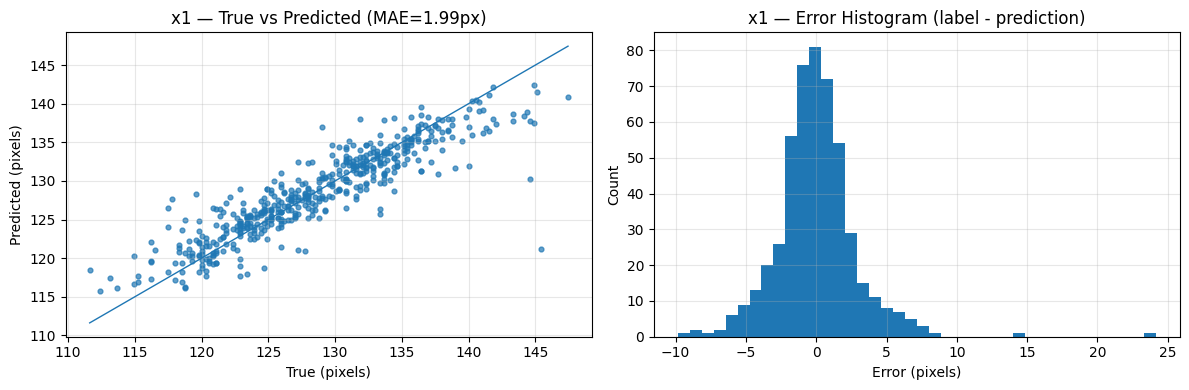

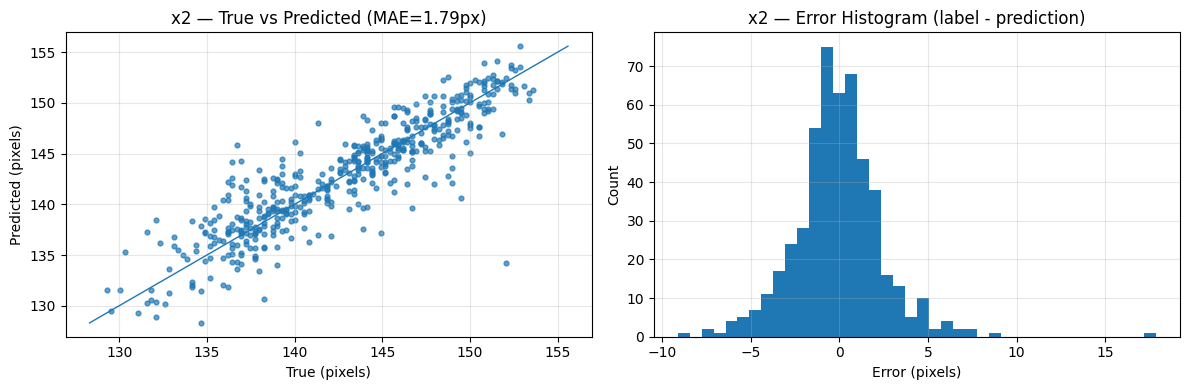

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# If y_px / preds_px aren't in memory, uncomment:
# y_px     = np.load("model/y_true_array3_px.npy")   # shape (N,2)
# preds_px = np.load("model/preds_array3_px.npy")    # shape (N,2)

def make_plots(y_col, p_col, name):
    y = y_px[:, y_col].astype(float)
    p = preds_px[:, y_col].astype(float)
    err = y - p
    mae = np.mean(np.abs(err))

    # ---- Figure: scatter + histogram ----
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Scatter: True vs Pred
    axes[0].scatter(y, p, s=12, alpha=0.7)
    lo = min(np.min(y), np.min(p))
    hi = max(np.max(y), np.max(p))
    axes[0].plot([lo, hi], [lo, hi], linewidth=1)  # y = x reference
    axes[0].set_title(f"{name} — True vs Predicted (MAE={mae:.2f}px)")
    axes[0].set_xlabel("True (pixels)")
    axes[0].set_ylabel("Predicted (pixels)")
    axes[0].grid(True, alpha=0.3)

    # Histogram: Errors (label - prediction)
    axes[1].hist(err, bins=40)
    axes[1].set_title(f"{name} — Error Histogram (label - prediction)")
    axes[1].set_xlabel("Error (pixels)")
    axes[1].set_ylabel("Count")
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Save figures
    fig.savefig(f"model/{name.replace(' ', '_').lower()}_scatter_hist.png", dpi=150)

# Make both x1 and x2 plots
make_plots(0, preds_px, "x1")
make_plots(1, preds_px, "x2")


In [35]:
import numpy as np
import pandas as pd

# ---------------- Load Data ----------------
y_true = np.load("model/y_true_array3_px.npy")   # shape: (N, 2)
y_pred = np.load("model/preds_array3_px.npy")    # shape: (N, 2)

# ---------------- Calculate Differences ----------------
diff_x1 = y_true[:, 0] - y_pred[:, 0]
diff_x2 = y_true[:, 1] - y_pred[:, 1]

# ---------------- Select 20 Samples ----------------
sample_idx = np.random.choice(len(y_true), 20, replace=False)

# Create DataFrame
df_samples = pd.DataFrame({
    "True x1": y_true[sample_idx, 0],
    "True x2": y_true[sample_idx, 1],
    "Pred x1": y_pred[sample_idx, 0],
    "Pred x2": y_pred[sample_idx, 1],
    "Diff x1": diff_x1[sample_idx],
    "Diff x2": diff_x2[sample_idx]
})

# Round values for readability
df_samples = df_samples.round(2)

# ---------------- Display ----------------
print("\n📊 Sample Predictions for Array3 (First 20 Samples)\n")
print(df_samples.to_string(index=False))



📊 Sample Predictions for Array3 (First 20 Samples)

   True x1    True x2    Pred x1    Pred x2  Diff x1  Diff x2
138.500000 151.550003 136.589996 151.399994     1.90     0.15
131.839996 140.800003 128.839996 140.949997     3.00    -0.15
134.399994 145.660004 131.179993 142.419998     3.22     3.24
120.059998 131.839996 118.680000 131.570007     1.38     0.27
121.089996 136.699997 124.269997 138.759995    -3.18    -2.05
123.900002 145.919998 124.050003 145.850006    -0.15     0.07
125.949997 149.759995 125.980003 150.160004    -0.03    -0.40
128.000000 140.539993 128.970001 139.240005    -0.97     1.30
128.259995 133.119995 125.580002 135.929993     2.67    -2.81
129.279999 150.779999 130.410004 149.960007    -1.13     0.82
120.580002 136.960007 120.010002 137.160004     0.57    -0.20
124.669998 147.710007 127.739998 145.289993    -3.06     2.42
145.149994 151.039993 141.500000 152.460007     3.65    -1.42
128.770004 138.500000 128.720001 139.059998     0.05    -0.57
132.350006 144.13